In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
path = '.'

# Holiday_Events.csv

In [2]:
holiday = pd.read_csv(f"{path}/holidays_events.csv")

In [3]:
#1. 컬럼명 한글화
columns = ['날짜','휴일유형','지역단위','지역명','휴일명','이전여부']
holiday.columns = columns

#2. 데이터 확인
display(holiday.head(5))
print(holiday.shape)

#3. 결측치 확인 및 처리
holiday.isnull().sum().sum()

,날짜,휴일유형,지역단위,지역명,휴일명,이전여부
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


(350, 6)


0

# oil.csv

* 에콰도르의 유일한 석유 회사인 Petroecuador에서 매일 공개하는 국제유가 정보
* 에콰도르가 석유 의존적(석유가격이 국가경제에 큰 영향)인 국가

  => 오일쇼크에 매우 취약한 경제 상태에 놓여있다는 것을 의미


In [4]:
# 2013/01/01 - 2017/08/31의 일일 국제유가
oil_df = pd.read_csv(f"{path}/oil.csv")

# 1. 컬럼명 한글화
columns = ['날짜','국제유가']
oil_df.columns = columns

# 2. 데이터 확인
display(oil_df.head(5))
print(oil_df.shape)

# 3. 결측치 확인
oil_df.isnull().sum()

,날짜,국제유가
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


(1218, 2)


날짜       0
국제유가    43
dtype: int64

In [5]:
# 3-1. 결측치 처리 -> 43개 존재

# 데이터 특성상 유가가 0 ->  데이터 분석하는데 있어서 악영향  
# 해당 월의 중간값으로 설정
# => 전체 날짜의 평균으로 하면 해당 시기의 유가 흐름을 반영하지 못할수도 있으므로 

oil = oil_df.copy()
oil['날짜'] = pd.to_datetime(oil['날짜'])

def 일일유가채우기(df):
    
    year_list = df['날짜'].dt.year.unique()
    month_list = df['날짜'].dt.month.unique()
    
    for year in year_list:
        for month in month_list:
            condition = (df['날짜'].dt.year == year) & (df['날짜'].dt.month == month)
            median = df.loc[condition, '국제유가'].median()
            df.loc[condition & df['국제유가'].isna(), '국제유가'] = median
            
    return df

일일유가채우기(oil)
oil['국제유가'].isnull().sum()

0

<AxesSubplot:xlabel='날짜', ylabel='국제유가'>

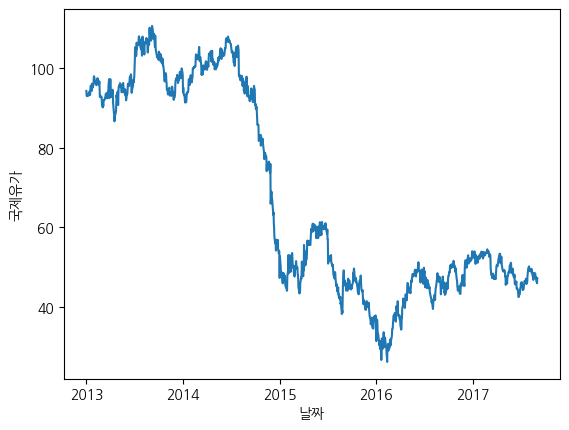

In [6]:
# 4. 시각화 해보기

# 4-1. Insight 발굴 => 15년도 초 & 16년도 초 국제유가 폭락의원인은?
# 석유 생산량 & 다양한 원인으로 인한 수요감소

# 국제유가 감소했다는 것은 에콰도르 경제상태 악화
# 원유 수출이 국민소득 및 국가 예산의 대다수를 차지하는 국가

# 국제 유가지수가 감소하면, 에콰도르가 원유 수출을 통해 얻는 수익 감소 -> 물가 상승 등 경제에 부정적 영향
# => 이 시기에 판매량이 증가 및 감소한 family(사업부문) -> 추후 유가 감소 예상 시 promotion 등 진행가능

sns.lineplot(data=oil, x='날짜',y='국제유가')

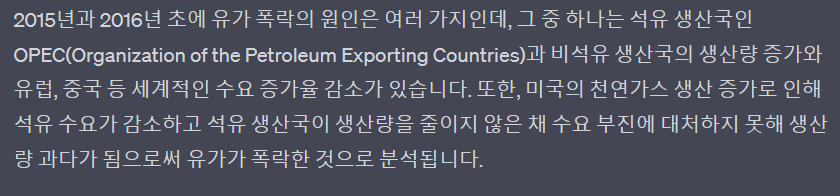

1) OPEC와 비석유생산국 생산량 증가 & 세계적으로 수요 감소(미국의 천연가스 생산 증가 등)

   * 생산량유지 -> 수요부진에 대처 미흡 -> 생산량과다 -> 유가폭락

In [7]:
oil['날짜'] = oil['날짜'].astype(str)

# stores.csv 

store_nbr : 매장번호(정수형)

city: 매장이 위치한 도시(문자열)

state: 매장이 위치한 주(문자열)

type: 매장의 유형(문자열)
매장의 크기와 제공하는 상품의 종류에 따라 구분

cluster : 매장 별 클러스터(정수형)
매장의 위치와 유형, 상품 등의 정보를 바탕으로 비슷한 그룹을 한 그룹으로 묶어놓음

* store_nbr을 기준으로 merge 하면 어떤 시티, 주 에서 type별로 어떤 제품을 판매하는지,
어떤 기준으로 clustering 되어있는지 확인해보기

In [8]:
stores = pd.read_csv(f'{path}/stores.csv')

#1. 컬럼명 한글화
columns = ['매장번호', '매장위치(도시)','매장위치(주)','매장유형','매장군집화']
stores.columns = columns

#2. 데이터확인
display(stores.head(5))
print(stores.shape)

#3. 결측치 확인 및 처리
stores.isnull().sum().sum()

,매장번호,매장위치(도시),매장위치(주),매장유형,매장군집화
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


(54, 5)


0

In [9]:
# 수도인 'Quito'지역 매장들의 매장정보
stores_qu = stores.loc[(stores['매장위치(도시)'] == 'Quito')]

# 'Quito'지역 매장들의 매장번호
qu_store_num = stores_qu['매장번호'].unique()

# transaction.csv

transactions : 각 매장에서 해당 날짜에 발생한 거래 수(매출 건수)

In [10]:
transactions = pd.read_csv(f'{path}/transactions.csv')

#1. 컬럼명 한글화
columns = ['날짜','매장번호','거래건수']
transactions.columns = columns

#2. 데이터 확인
display(transactions.head(5))
print(transactions.shape)

#3. 결측치 확인
print(transactions.isnull().sum().sum())

#4. 수도 'Quito' 지역의 거래건수
qu_trans = transactions.loc[transactions['매장번호'].isin(qu_store_num)]

,날짜,매장번호,거래건수
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


(83488, 3)
0


# train & test.csv

In [11]:
train = pd.read_csv(f'{path}/train.csv')
test = pd.read_csv(f'{path}/test.csv')

In [12]:
#1. 컬럼명 한글화
columns_1 = ['고유식별번호','날짜','매장번호','품목분류','판매량','프로모션진행개수']
train.columns = columns_1

columns_2 = ['고유식별번호','날짜','매장번호','품목분류', '프로모션진행개수']
test.columns =columns_2

#2. 데이터 확인
display(train.head(3))
display(test.head(3))
train.shape, test.shape

,고유식별번호,날짜,매장번호,품목분류,판매량,프로모션진행개수
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0


,고유식별번호,날짜,매장번호,품목분류,프로모션진행개수
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2


((3000888, 6), (28512, 5))

In [13]:
# stores.csv (매장정보) merge
train = train.loc[train['매장번호'].isin(qu_store_num)].reset_index()
train = train.drop(columns='index')
train['판매량']= round(train['판매량'],2)
train = train.merge(stores_qu, on='매장번호', how='left')
train = train.drop(columns=['고유식별번호','매장유형','매장군집화'])

test= test.loc[test['매장번호'].isin(qu_store_num)].reset_index()
test = test.drop(columns='index')
test = test.merge(stores_qu, on='매장번호', how='left')
test = test.drop(columns=['고유식별번호','매장유형','매장군집화'])

display(train.head(3))
display(test.head(3))
train.shape, test.shape

,날짜,매장번호,품목분류,판매량,프로모션진행개수,매장위치(도시),매장위치(주)
0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha
1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha
2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha


,날짜,매장번호,품목분류,프로모션진행개수,매장위치(도시),매장위치(주)
0,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha
1,2017-08-16,1,BABY CARE,0,Quito,Pichincha
2,2017-08-16,1,BEAUTY,2,Quito,Pichincha


((1000296, 7), (9504, 6))

In [14]:
# oil.csv (국제유가) merge
oil_train = oil.loc[:1205,:]
oil_test = oil.loc[1205:,:]

train = train.merge(oil_train, how='left', on='날짜')
test = test.merge(oil_test, how='left', on='날짜')

train['날짜'] = pd.to_datetime(train['날짜'])
test['날짜'] = pd.to_datetime(test['날짜'])

def 일일유가채우기(df):
    
    year_list = df['날짜'].dt.year.unique()
    month_list = df['날짜'].dt.month.unique()
    
    for year in year_list:
        for month in month_list:
            condition = (df['날짜'].dt.year == year) & (df['날짜'].dt.month == month)
            median = df.loc[condition, '국제유가'].median()
            df.loc[condition & df['국제유가'].isna(), '국제유가'] = median
            
    return df

일일유가채우기(train)
일일유가채우기(test)

train['날짜'] = train['날짜'].astype(str)
test['날짜'] = test['날짜'].astype(str)

print(train['국제유가'].isnull().sum())
print(test['국제유가'].isnull().sum())

0
0


# 파일 저장

In [17]:
file_name_train = 'train_quito.csv'
file_name_test = 'test_quito.csv'

train.to_csv(f'{file_name_train}', index=False)
test.to_csv(f'{file_name_test}', index=False)

In [18]:
pd.read_csv('train_quito.csv')

,날짜,매장번호,품목분류,판매량,프로모션진행개수,매장위치(도시),매장위치(주),국제유가
0,2013-01-01,1,AUTOMOTIVE,0.00,0,Quito,Pichincha,94.28
1,2013-01-01,1,BABY CARE,0.00,0,Quito,Pichincha,94.28
2,2013-01-01,1,BEAUTY,0.00,0,Quito,Pichincha,94.28
3,2013-01-01,1,BEVERAGES,0.00,0,Quito,Pichincha,94.28
4,2013-01-01,1,BOOKS,0.00,0,Quito,Pichincha,94.28
...,...,...,...,...,...,...,...,...
1000291,2017-08-15,9,POULTRY,438.13,0,Quito,Pichincha,47.57
1000292,2017-08-15,9,PREPARED FOODS,154.55,1,Quito,Pichincha,47.57
1000293,2017-08-15,9,PRODUCE,2419.73,148,Quito,Pichincha,47.57
1000294,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.00,8,Quito,Pichincha,47.57
